# ECE324: Assignment 2, Part II

## Steps

- [x] Import torch.
- [x] Re-use data import code.
- [x] Implement a 1-neuron classifier in PyTorch.
    - [ ] Create a function to run an experiment given some hyperparameters.


In [1]:
##############
# IMPORT BOX #
##############

import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn

import pandas as pd

from dispkernel import *

In [2]:
###################
# DATA IMPORT BOX #
###################

train_X = np.loadtxt('traindata.csv', delimiter=',')
train_Y = np.loadtxt('trainlabel.csv', delimiter=',')
valid_X = np.loadtxt('validdata.csv', delimiter=',')
valid_Y = np.loadtxt('validlabel.csv', delimiter=',')

Tdata = torch.FloatTensor(train_X)
Tlabel = torch.from_numpy(train_Y)

Vdata = torch.FloatTensor(valid_X)
Vlabel = torch.from_numpy(valid_Y)

print("=== Validating Data ===")
print("Dimensions of training X: \t{}".format(train_X.shape))
print("Dimensions of training Y: \t{}".format(train_Y.shape))
print("")
print("Dimensions of validation X: \t{}".format(valid_X.shape))
print("Dimensions of validation Y: \t{}".format(valid_Y.shape))


=== Validating Data ===
Dimensions of training X: 	(200, 9)
Dimensions of training Y: 	(200,)

Dimensions of validation X: 	(20, 9)
Dimensions of validation Y: 	(20,)


In [3]:
class SNC(nn.Module):
    def __init__(self):
        super(SNC, self).__init__()

        self.fc1 = nn.Linear(9, 1)

    def forward(self, I):
        x = self.fc1(I)
        return x

In [41]:
def get_accuracy(labels, preds):
    l = np.asarray(labels.detach().numpy())
    p = np.asarray(preds.detach().numpy())

    one_if_diff = np.abs(np.round(p) - l)
    num_incorrect = sum(one_if_diff)
    accuracy = (len(p)-num_incorrect)/len(p)

    return accuracy


alpha = 0.05
num_epochs = 250


def run_experiment(alpha, num_epochs):
    smallNN = SNC()
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(smallNN.parameters(), lr=alpha)

    lossRec = []
    vLossRec = []
    TrainAccs = []
    ValidAccs = []

    for i in range(num_epochs):
        optimizer.zero_grad()

        pred = smallNN(Tdata)

        loss = loss_function(input=pred.squeeze(), target=Tlabel.float())

        loss.backward()
        
        # print('smallNN.fc1.bias.grad: {}'.format(smallNN.fc1.bias.grad))
        # print('type(smallNN.fc1): {}'.format(type(smallNN.fc1)))
        # print('type(smallNN.fc1.bias): {}'.format(type(smallNN.fc1.bias)))
        # print('type(smallNN.fc1.weight): {}'.format(type(smallNN.fc1.weight)))
        # print('type(smallNN.fc1.bias.grad): {}'.format(type(smallNN.fc1.bias.grad)))

        optimizer.step()

        # Record keeping
        lossRec.append(loss)

        # print(loss)

        TrainAccs.append(get_accuracy(Tlabel.float(), pred.squeeze()))
        ValidAccs.append(get_accuracy(Vlabel.float(), smallNN(Vdata).squeeze()))
        vLossRec.append(loss_function(input=smallNN(Vdata).squeeze(), target=Vlabel.float()))

    print('\n\nFinal Validation Accuracy: {}'.format(ValidAccs[-1]))

    plt.plot(TrainAccs)
    plt.plot(ValidAccs)
    plt.title('Training and Validation Accuracy Curves: LR = {}'.format(alpha))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'validation'])
    plt.show()

    plt.plot(lossRec)
    plt.plot(vLossRec)
    plt.title('Training and Validation Loss Curves: LR = {}'.format(alpha))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Loss')
    plt.legend(['train', 'validation'])
    plt.show()


smallNN.fc1.bias.grad: None


Final Validation Accuracy: 0.65


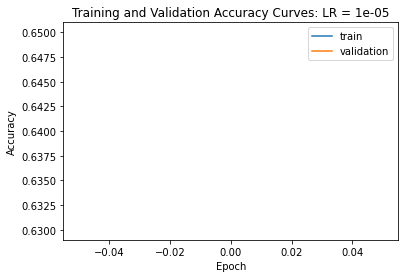

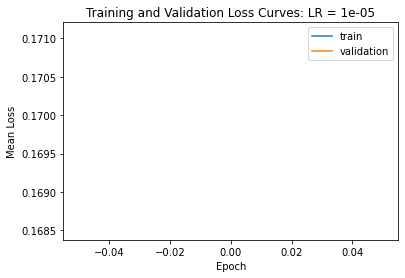

In [42]:
# Case 1: Too Low Learning Rate

run_experiment(0.00001, 250)



Final Validation Accuracy: 0.9


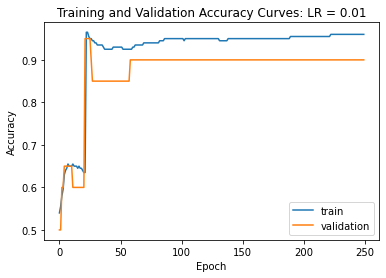

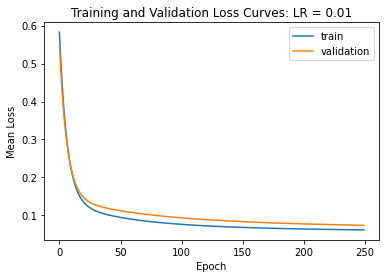

In [85]:
# Case 2: Correct Learning Rate

run_experiment(0.01, 250)



Final Validation Accuracy: nan


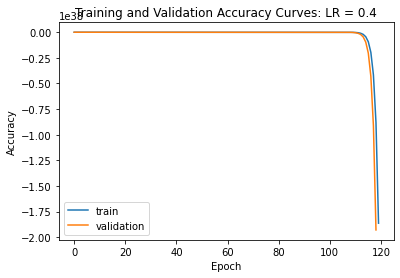

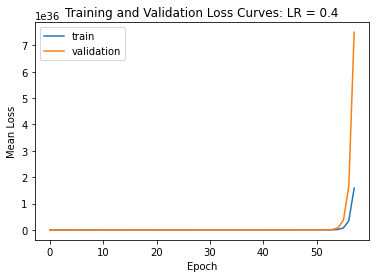

In [86]:
# Case 3: High Learning Rate

run_experiment(.4, 250)